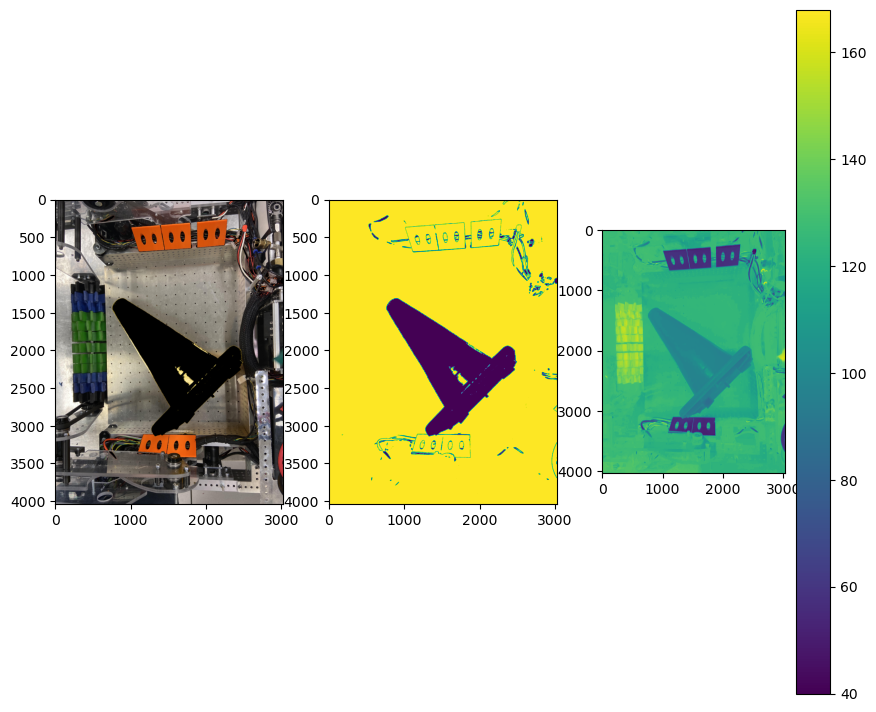

In [85]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image 

cone = 'cone.jpg'
img = np.array(Image.open(cone))
cv2.threshold(np.array(img), 12, 255, cv2.THRESH_BINARY)

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# store b-component
b_component = lab[:,:,2]

b_component_2 = np.where(b_component < 80, True,False)

_, th = cv2.threshold(b_component, 0, 255,  cv2.THRESH_OTSU)
th[b_component_2] = 255



result = cv2.bitwise_and(img, img, mask = th)
# cv2.threshold


# lower_red = np.array([30,150,50])
# upper_red = np.array([255,255,180])

# mask = cv2.inRange(hsv, lower_red, upper_red)
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,10)
ax[0].imshow(result)
ax[1].imshow(th)
img_to_show = ax[2].imshow(b_component)
fig.colorbar(img_to_show)
plt.show()

0.0


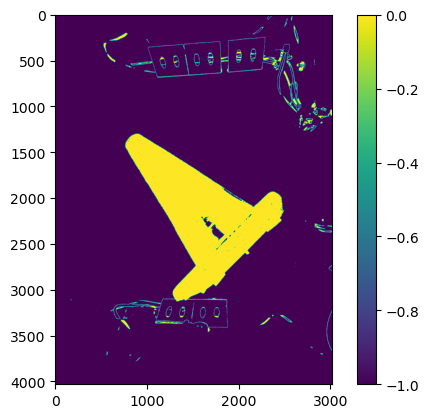

In [92]:
th2 = np.array(th,dtype="int16")
th3 = -1 * th2
plt.imshow(np.array(th3))
plt.colorbar()

print(th[2000,1200])

In [104]:
th4 = th3 - np.min(th3)

In [117]:
small_to_large_image_size_ratio = 0.025
small_img = cv2.resize(th4, # original image
                       (0,0), # set fx and fy, not the final size
                       fx=small_to_large_image_size_ratio, 
                       fy=small_to_large_image_size_ratio, 
                       interpolation=cv2.INTER_NEAREST)

In [106]:
th4 = th3 / np.max(th)

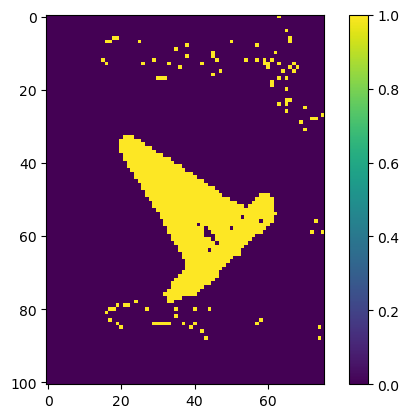

In [119]:
plt.imshow(small_img)
plt.colorbar()

In [122]:
print(f"amount of pixels as 1, {len(small_img[small_img==1])}; amount of pixels as 0, {len(small_img[small_img==0])}; amount of pixels overall, {small_img.shape[0] * small_img.shape[1]}")

amount of pixels as 1, 847; amount of pixels as 0, 6829; amount of pixels overall, 7676


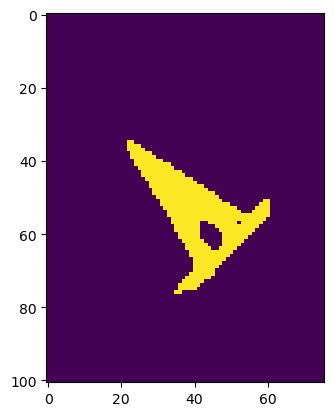

In [300]:
#wip image denoising

h = small_img.shape[0]
w = small_img.shape[1]

denoised = np.zeros(small_img.shape)
surrounding_pixels = 2
percent_of_surrounding_pixels_required = 0.9

for i in range(surrounding_pixels,h-surrounding_pixels):
    for j in range(surrounding_pixels,w-surrounding_pixels):
        denoised[i,j] = 1 if np.average(small_img[i-surrounding_pixels:i+surrounding_pixels,
                                                  j-surrounding_pixels:j+surrounding_pixels]) 
                                                >= percent_of_surrounding_pixels_required else 0
plt.imshow(denoised)

Text(0.5, 1.0, 'pixels projected on width axis')

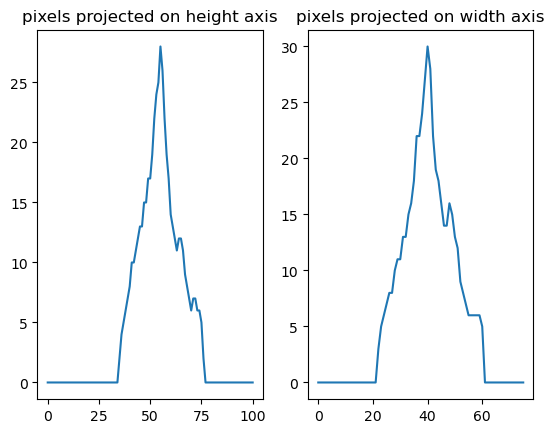

In [301]:
# justification for using argmax for max pixel
fig, ax = plt.subplots(1,2)

ax[0].plot(np.sum(denoised,axis=1))
ax[0].set_title("pixels projected on height axis")


ax[1].plot(np.sum(denoised,axis=0))
ax[1].set_title("pixels projected on width axis")

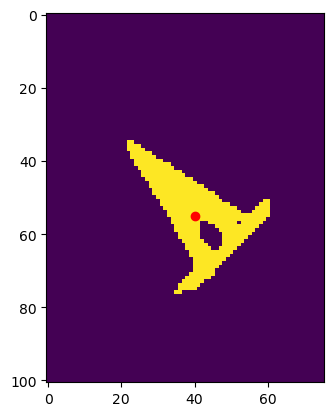

In [302]:
mean_height = np.argmax(np.reshape(np.sum(denoised,axis=1),(-1,1)))
mean_width = np.argmax(np.reshape(np.sum(denoised,axis=0),(1,-1)))

mean_height = np.ceil(mean_height)
mean_width = np.ceil(mean_width)

plt.plot(mean_width,mean_height,"ro")

plt.imshow(denoised)

In [303]:
# fit a regression line 

max_dist_point = (mean_height,mean_width)
max_dist_distance = -1 


data_x = np.zeros((w*h))
data_y = np.zeros((w*h))
for i in range(0,h):
    for j in range(0,w):
        if denoised[i,j] == 1.0:
            distance = np.linalg.norm(np.array((mean_height-i,mean_width-j)))
#             print(i,j,distance)
            if distance > max_dist_distance:
#                 print("HERE:" + str(distance))
                max_dist_distance = distance
                max_dist_point = (i,j)
#                 print(i,j,distance)
                
        

In [304]:
max_dist_point

(35, 22)

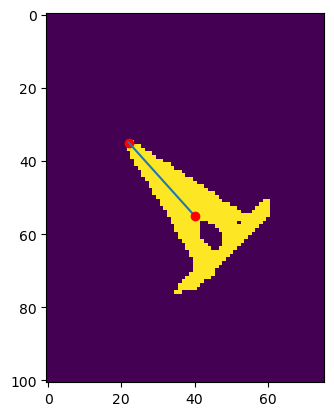

In [307]:
plt.plot(max_dist_point[1],max_dist_point[0],"ro")

plt.plot((max_dist_point[1],mean_width),
         (max_dist_point[0],mean_height))

plt.plot(mean_width,mean_height,"ro")
plt.imshow(denoised)

In [316]:
# line is equal to the line between the center and the peak; the direction is the inverse cosine of the cosine similarity 
vector = np.array((max_dist_point[1]-mean_width, max_dist_point[0]-mean_height))
cosine_reference = np.array((1,0))

import math 
cosine_similarity = np.dot(vector,cosine_reference)/ (np.linalg.norm(cosine_reference) * np.linalg.norm(vector))
angle = math.acos(cosine_similarity)

print(angle * 180/math.pi)

131.98721249581666
